# Image classification with a Convolutional Neural Network

This Jupyter Notebook is created to demonstrate a convolutional neural network (CNN) using `keras` for a binary classification of labeled images from a well-known dataset.



*Author: Abdul Moeed Mohammad*

### Table of contents

1. [Background](#back)
2. [Framework](#data)
3. [Construction the CNN](#cnn)
4. [Training and testing](#tt)
5. [Evaluation](#eval)

## 1. Background <a id="back">

Given an image, how can we predict the content of the image? For example, given that all images can be binary classified, how well can we predict the classification?

<img src="https://i.imgur.com/RRiexe9.jpg" width="50%">

 In this notebook, we construct a two-dimensional convolutional neural network to correctly classify images of cats and dogs. Our training dataset is obtained from an older <a href="https://www.kaggle.com/c/dogs-vs-cats/data">Kaggle</a> competition.

## 2. Framework <a id="data">

In [1]:
#Sequential model.
from keras.models import Sequential
from keras.layers import Activation, Dense

#Getting necessary layers.
from keras.layers import Conv2D             #Two-dimensional convolution layer.
from keras.layers import MaxPooling2D       #Two-dimensional pooling layer.
from keras.layers import Flatten            #Flattening layer.
from keras.layers import Dropout            #Regularization to prevent overfitting.

#Image preprocessing.
from keras.preprocessing.image import ImageDataGenerator       
from keras.preprocessing import image

#Operating system interface.
import os

#Plotting library.
import matplotlib.pyplot as plt

#Other libraries.
import numpy as np
import random
import PIL

Using TensorFlow backend.


## 3. Construction the CNN <a id="cnn">

We construct a linear stack of layers.

In [2]:
#Linear layering.
classifier = Sequential()

First, we extract a $32$ output filters in the convolution with a $3\times 3$ convolutional window. Second, we down-sample by half in each dimension. Third, we flatten to reduce the dimensions.

In [3]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))   #Convolutional layer.
classifier.add(MaxPooling2D(pool_size = (2, 2)))                                     #Down-sampling.
classifier.add(Flatten())                                                            #Projecting to lower dimensions.

We construct our input layer with $128$ inputs, regularize to prevent overfitting in between and output a binary predictive outcome (cats and dogs).

In [4]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [5]:
#Compiling our CNN.
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


## 4. Training <a id="tt">

Since our images are colored images and the RGB coefficients are in range (0-255), we standardize our images by dividing by 255. We also add some random horizontal flipping of the images, shearing and zooming of images in the training data.

In [6]:
train_images = ImageDataGenerator(rescale = 1./255, validation_split=0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

Next, we label images.

In [7]:
path = "Downloads/datafolder-0/train"

def makeLabeledFolders(path, label):
    folder_path = path+"/"+label+"/"
    if not os.path.exists(folder_path):
        os.mkdir(folder_path)
    for f in os.listdir(path):
        if f.endswith(".jpg") and f.startswith(label):
            os.rename(path+"/"+f, folder_path+f)

#Making labeled folders for each animal type.
makeLabeledFolders(path, "cat")
makeLabeledFolders(path, "dog")

Now, we preview some of the images at random.

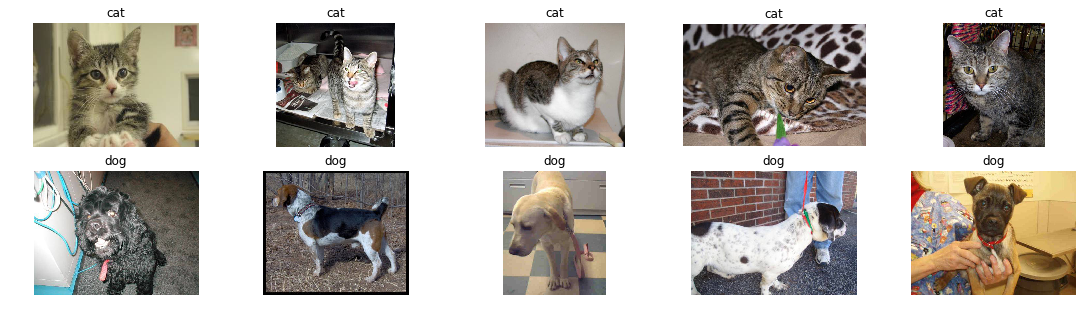

In [8]:
#Getting random images from the categories.
def randomFiles(folder, num_cat):
    random_files = []
    for i in range(len(folder)):
        for j in range(num_cat):
            files = os.listdir(folder[i])
            index = random.randrange(0, len(files))
            random_files.append(folder[i]+"/"+files[index])
    return random_files

folder = [path+"/"+"cat",path+"/"+"dog"]
random_images = randomFiles(folder, 5)

#Previewing the images.
plt.figure(figsize=(19,5))
for index, path in enumerate(random_images):
    temp_image = PIL.Image.open(path)
    plt.subplot(2,5,index+1)
    plt.title(path.split('.')[-3].split('/')[-1])
    plt.imshow(temp_image)
    plt.axis('off')

We construct a training set of images and a test set of images.

In [9]:
training_set = train_images.flow_from_directory("Downloads/datafolder-0/train", target_size = (64, 64), batch_size = 32, class_mode = 'binary', subset='training')
test_set = train_images.flow_from_directory("Downloads/datafolder-0/train", target_size = (64, 64), batch_size = 32, class_mode = 'binary', subset='validation')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


We train our classifying model.

In [10]:
model = classifier.fit_generator(training_set, steps_per_epoch = 50, epochs = 20, validation_data=test_set, validation_steps=10)

Epoch 1/20
50/50 [==============================] - 37s 733ms/step - loss: 0.9451 - acc: 0.4975 - val_loss: 0.6905 - val_acc: 0.5375
Epoch 2/20
50/50 [==============================] - 35s 694ms/step - loss: 0.6794 - acc: 0.5600 - val_loss: 0.6912 - val_acc: 0.4813
Epoch 3/20
50/50 [==============================] - 35s 695ms/step - loss: 0.6657 - acc: 0.6019 - val_loss: 0.6547 - val_acc: 0.5813
Epoch 4/20
50/50 [==============================] - 36s 712ms/step - loss: 0.6365 - acc: 0.6481 - val_loss: 0.6266 - val_acc: 0.6531
Epoch 5/20
50/50 [==============================] - 35s 699ms/step - loss: 0.6345 - acc: 0.6531 - val_loss: 0.6224 - val_acc: 0.6438
Epoch 6/20
50/50 [==============================] - 36s 727ms/step - loss: 0.6152 - acc: 0.6650 - val_loss: 0.6258 - val_acc: 0.6594
Epoch 7/20
50/50 [==============================] - 36s 715ms/step - loss: 0.6200 - acc: 0.6719 - val_loss: 0.6041 - val_acc: 0.6531
Epoch 8/20
50/50 [==============================] - 35s 700ms/step - 

## 5. Evaluation <a id="eval">

We plot the accuracy rating and the loss function relative to the epochs, for both our training set and the validation set.

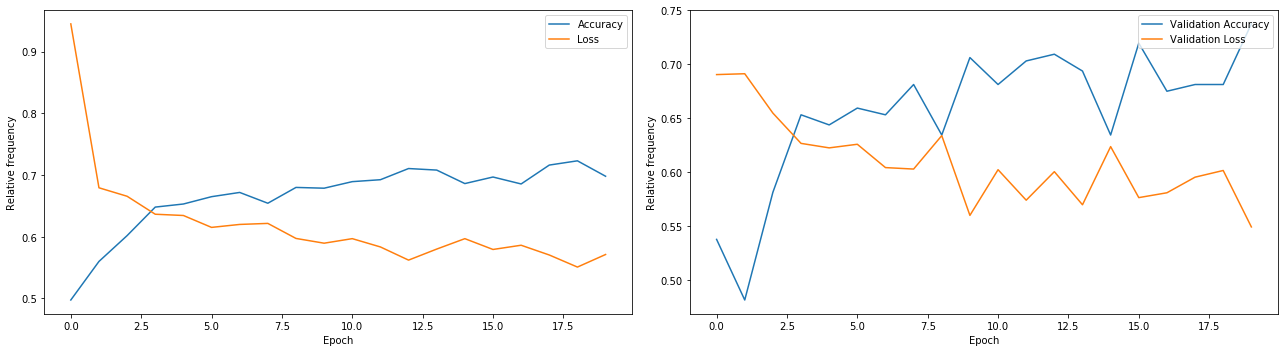

In [11]:
plt.figure(figsize=(18,5))

#Accuray and loss.
plt.subplot(1, 2, 1)
plt.plot(model.history['acc'])
plt.plot(model.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Relative frequency')
plt.legend(['Accuracy', 'Loss'], loc='upper right')

#Validation accuracy and validation loss.
plt.subplot(1, 2, 2)
plt.plot(model.history['val_acc'])
plt.plot(model.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Relative frequency')
plt.legend(['Validation Accuracy', 'Validation Loss'], loc='upper right')

plt.tight_layout()
plt.show()